# HW 2

Write a program to find the coefficients for a linear regression model for the dataset provided (data2.txt). Assume a linear model: y = w0 + w1*x. 

## 1.) Plotting the Data

In [395]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import numpy as np
import pandas as pd

filename = '/Users/erinbrown/Desktop/ML Class Folder/ML Homework 2/data2.txt'
data = np.loadtxt(filename, delimiter=',')

#print(data)
#^remove comment symbol to print data

#converting .txt file to .csv
#removing header and adding column names
columns = ['x-axis', 'y-axis']
df = pd.read_csv("/Users/erinbrown/Desktop/ML Class Folder/ML Homework 2/data2.txt", header=None, names=columns)
df.to_csv('data2.csv')
print(df.head())
#remove .head to show all data values

   x-axis   y-axis
0  6.1101  17.5920
1  5.5277   9.1302
2  8.5186  13.6620
3  7.0032  11.8540
4  5.8598   6.8233


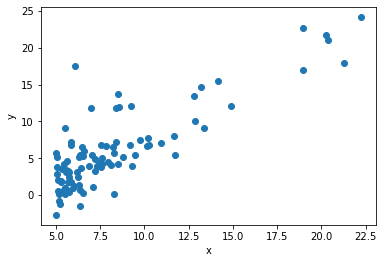

In [396]:
X = df['x-axis'].values
Y = df['y-axis'].values

plt.figure()
plt.scatter(X, Y)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 2.) Finding the Coefficients

Using the Normal Equation
<div>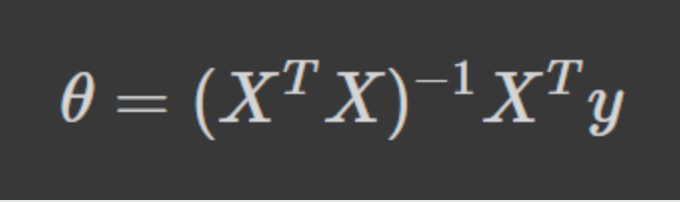</div>

In [397]:
#Combine a vector of ones to a length of 97, concatenated to X
X_b = np.c_[np.ones((97, 1)), X] 

#Normal Equation
w = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
print(f'Coefficients: {w}')

Coefficients: [-3.89578088  1.19303364]


In [398]:
#Predict values for y
x_predict = np.array([[0],[25]])
#concatenate ones to x_predict
x_predict_b = np.c_[np.ones((2,1)), x_predict]
y_predict = x_predict_b.dot(w)

Text(0, 0.5, 'Y')

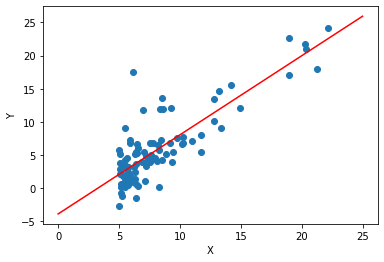

In [399]:
plt.scatter(X, Y)
plt.plot(x_predict, y_predict, 'r-')
plt.xlabel('X')
plt.ylabel('Y')

## 3.) Gradient Descent, Batch

In [400]:
#Calculate cost

def calc_cost(x, y, w): 
    N = len(x) 
    cost_sum = 0.0
    for X,Y in zip(x, y):
        feature_vector = np.array([1.0,X])
        predicted_value = np.dot(w, feature_vector)
        squared_error = (predicted_value - Y) ** 2
        cost_sum += squared_error
    cost = cost_sum / (N * 2) 
    
    return cost

In [401]:
def batch_gradient_descent(x, y, w, lr, max_it):
    
    it,N = 0,len(x)
    cost = np.zeros(max_it)
    params_store = np.zeros([2, max_it])
    
    for i in range(1,max_it):
        cost[it] = calc_cost(x, y, w)
        params_store[:, it] = w
        
        print(f'iteration: {it}')
        print(f'cost: {cost[it]}')
        print("\n")

        
        for X,Y in zip(x, y):
         
            feature_vector = np.array([1.0, X])
            y_hat = np.dot(w, np.array([1.0, X])) 
            gradient = feature_vector * (Y - y_hat) 
            w += lr * gradient/N  
            
        it += 1
    
    return w, cost, params_store

Split dataset into 80% for training and 20% for testing.

In [402]:
#training the model
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20)

w = np.array([20.0, 80.0])

lr_batch = 0.02
max_it = 300
params_hat_batch, cost_batch, params_store_batch = batch_gradient_descent(x_train, y_train, w, lr_batch, max_it)

iteration: 0
cost: 300339.78268184816


iteration: 1
cost: 6809.36874312897


iteration: 2
cost: 185.29148242659875


iteration: 3
cost: 32.45834362221324


iteration: 4
cost: 28.28039471061015


iteration: 5
cost: 27.921264786181347


iteration: 6
cost: 27.720667241822472


iteration: 7
cost: 27.535693603619745


iteration: 8
cost: 27.35403085418248


iteration: 9
cost: 27.174028646495547


iteration: 10
cost: 26.995435222439983


iteration: 11
cost: 26.818204134217385


iteration: 12
cost: 26.6423196906402


iteration: 13
cost: 26.467770877080643


iteration: 14
cost: 26.29454744585098


iteration: 15
cost: 26.122639329413143


iteration: 16
cost: 25.95203655188307


iteration: 17
cost: 25.782729215269093


iteration: 18
cost: 25.614707496922165


iteration: 19
cost: 25.447961648671274


iteration: 20
cost: 25.282481996215246


iteration: 21
cost: 25.118258938556657


iteration: 22
cost: 24.95528294744559


iteration: 23
cost: 24.79354456682847


iteration: 24
cost: 24.63303441230112

iteration: 236
cost: 7.832920560678072


iteration: 237
cost: 7.801355515625738


iteration: 238
cost: 7.770031069757973


iteration: 239
cost: 7.73894539528497


iteration: 240
cost: 7.708096678279195


iteration: 241
cost: 7.677483118570343


iteration: 242
cost: 7.647102929641092


iteration: 243
cost: 7.61695433852365


iteration: 244
cost: 7.587035585697048


iteration: 245
cost: 7.557344924985279


iteration: 246
cost: 7.527880623456132


iteration: 247
cost: 7.49864096132086


iteration: 248
cost: 7.469624231834563


iteration: 249
cost: 7.440828741197343


iteration: 250
cost: 7.412252808456214


iteration: 251
cost: 7.383894765407735


iteration: 252
cost: 7.355752956501403


iteration: 253
cost: 7.327825738743748


iteration: 254
cost: 7.3001114816032


iteration: 255
cost: 7.272608566915629


iteration: 256
cost: 7.2453153887906305


iteration: 257
cost: 7.218230353518517


iteration: 258
cost: 7.191351879477992


iteration: 259
cost: 7.164678397044565


iteration: 260
cost:

## Stochastic Gradient Descent

In [403]:
def stoch_gradient_descent(input_var, output_var, params, lr):
    
    N = len(input_var)
    cost = np.zeros(N)
    params_store = np.zeros([2, N])
    
    it = 0
    for X,Y in zip(input_var, output_var):
        cost[it] = compute_cost(input_var, output_var, params)
        params_store[:, it] = params
        
        print(f'iteration: {it}')
        print(f'cost: {cost[it]}')
        print("\n")
        
        y_hat = np.dot(params, np.array([1.0, X]))
        gradient = np.array([1.0, X]) * (Y - y_hat)
        params += lr * gradient/N
        
        it += 1
            
    return params, cost, params_store

In [404]:
lr = 0.02
params_0 = np.array([20.0, 80.0])
params_hat, cost, params_store = stoch_gradient_descent(x_train, y_train, params_0, lr)

iteration: 0
cost: 300339.78268184816


iteration: 1
cost: 295651.4155801715


iteration: 2
cost: 289291.1087037908


iteration: 3
cost: 284589.11074995366


iteration: 4
cost: 276953.4069313996


iteration: 5
cost: 268421.558698226


iteration: 6
cost: 264157.9677635971


iteration: 7
cost: 259363.387864879


iteration: 8
cost: 254602.3915504148


iteration: 9
cost: 247545.16670917158


iteration: 10
cost: 230128.2990352683


iteration: 11
cost: 225098.0690284966


iteration: 12
cost: 222017.78347926433


iteration: 13
cost: 218255.2556222022


iteration: 14
cost: 211230.36223884815


iteration: 15
cost: 204218.0631999193


iteration: 16
cost: 186259.95926238262


iteration: 17
cost: 145389.4065255154


iteration: 18
cost: 143355.57042134696


iteration: 19
cost: 131318.9173167056


iteration: 20
cost: 128282.81462507605


iteration: 21
cost: 126379.12973688192


iteration: 22
cost: 123140.82789611425


iteration: 23
cost: 116456.79169871818


iteration: 24
cost: 112002.11056632895




## Visualization

b) Plot MSE vs. iteration of each mode for both training set and testing set; compare batch
and stochastic modes in terms of accuracy (of testing set) and speed of convergence. 

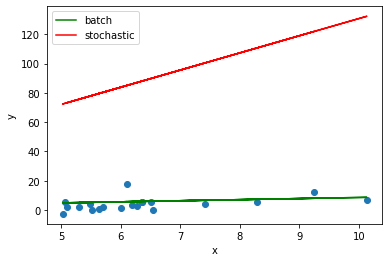

Batch Parameters
c(y-int) 1.1438831426552962, 
m(Slope): 0.740745486670232

Stochastic Parameters
c(y-int)13.388530952632902, 
m(Slope): 11.73419836495473

batch rms:      4.340505938963888
stochastic rms: 85.73662827075218


In [405]:
plt.figure()
plt.scatter(x_test, y_test)
plt.plot(x_test, params_hat_batch[0] + params_hat_batch[1]*x_test, 'g')
plt.plot(x_test, params_hat[0] + params_hat[1]*x_test, '-r')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['batch', 'stochastic'])
plt.show()
print("Batch Parameters")
print(f'c(y-int) {params_hat_batch[0]}, \nm(Slope): {params_hat_batch[1]}')
print("\nStochastic Parameters")
print(f'c(y-int){params_hat[0]}, \nm(Slope): {params_hat[1]}')
rms_batch = np.sqrt(np.mean(np.square(params_hat_batch[0] + params_hat_batch[1]*x_test - y_test)))
rms_stochastic = np.sqrt(np.mean(np.square(params_hat[0] + params_hat[1]*x_test - y_test)))
print(f'\nbatch rms:      {rms_batch}')
print(f'stochastic rms: {rms_stochastic}')

The diagram above is the plot that shows X vs Y. All the training data is plotted and the lines correspond to the parameters trained by batch and stochastic gradient descent. 

In regards to the root mean squared error (RMS), the lower the value the better the approximation of the data. Therefore the data shows that the batch solution is better than the stochastic. 

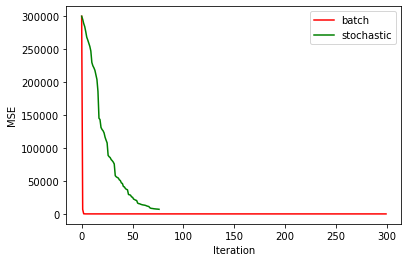

Batch MSE: 0.0
Stochastic MSE: 7030.677661768253


In [406]:
plt.figure()
plt.plot(np.arange(max_it), cost_batch, 'r')
plt.plot(np.arange(len(cost)), cost, 'g')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend(['batch', 'stochastic'])
plt.show()
print(f'Batch MSE: {np.min(cost_batch)}')
print(f'Stochastic MSE: {np.min(cost)}')

Convergence is the data meeting at a local optimum where the learning rate is gradually reduced towards zero. The batch gradient descent is converging at a faster rate than the stochastic. The learning rate of 0.02 appears to be a good learning rate by observation of the graph.

## Learning Rate Comparisons


c) Plot MSE vs. learning rate (using 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1) and determine the best learning rate.

In [407]:
w = np.array([20.0,80.0])
max_it = 300
lrs = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
batch_mse = []
stoch_mse = [] 

for it in lrs:
    params_hat_batch, cost_batch, params_store_batch = batch_gradient_descent(x_train, y_train, w, it, max_it)
    params_hat, cost, params_store = stoch_gradient_descent(x_train, y_train, w, lr)
    batch_mse.append(cost_batch)
    stoch_mse.append(cost)


iteration: 0
cost: 300339.78268184816


iteration: 1
cost: 46357.60823560295


iteration: 2
cost: 7185.03489469188


iteration: 3
cost: 1137.7361634930126


iteration: 4
cost: 201.95246561035654


iteration: 5
cost: 56.23203765512797


iteration: 6
cost: 33.14268249939191


iteration: 7
cost: 29.28928092163566


iteration: 8
cost: 28.531935722289255


iteration: 9
cost: 28.30340395656261


iteration: 10
cost: 28.17680534767326


iteration: 11
cost: 28.07411137788765


iteration: 12
cost: 27.978495327860685


iteration: 13
cost: 27.885479522712274


iteration: 14
cost: 27.793633794923686


iteration: 15
cost: 27.702446652464655


iteration: 16
cost: 27.61172437842077


iteration: 17
cost: 27.5213913723822


iteration: 18
cost: 27.431417372505486


iteration: 19
cost: 27.341789755013906


iteration: 20
cost: 27.25250279641744


iteration: 21
cost: 27.163553480216528


iteration: 22
cost: 27.074939854514078


iteration: 23
cost: 26.98666038798691


iteration: 24
cost: 26.89871371722121




iteration: 269
cost: 12.870067501438136


iteration: 270
cost: 12.83534152405014


iteration: 271
cost: 12.800746524114992


iteration: 272
cost: 12.766282008095496


iteration: 273
cost: 12.731947484313306


iteration: 274
cost: 12.69774246294183


iteration: 275
cost: 12.663666455999351


iteration: 276
cost: 12.629718977342048


iteration: 277
cost: 12.595899542657023


iteration: 278
cost: 12.562207669455477


iteration: 279
cost: 12.528642877065797


iteration: 280
cost: 12.49520468662678


iteration: 281
cost: 12.461892621080718


iteration: 282
cost: 12.428706205166684


iteration: 283
cost: 12.395644965413723


iteration: 284
cost: 12.362708430134136


iteration: 285
cost: 12.329896129416783


iteration: 286
cost: 12.297207595120316


iteration: 287
cost: 12.264642360866603


iteration: 288
cost: 12.232199962034052


iteration: 289
cost: 12.199879935751007


iteration: 290
cost: 12.167681820889108


iteration: 291
cost: 12.135605158056821


iteration: 292
cost: 12.1036494895928

cost: 7.459247092612401


iteration: 102
cost: 7.43053072420001


iteration: 103
cost: 7.402033312514696


iteration: 104
cost: 7.3737531939127265


iteration: 105
cost: 7.345688717368756


iteration: 106
cost: 7.317838244380193


iteration: 107
cost: 7.2902001488722945


iteration: 108
cost: 7.262772817104007


iteration: 109
cost: 7.23555464757446


iteration: 110
cost: 7.208544050930241


iteration: 111
cost: 7.18173944987332


iteration: 112
cost: 7.155139279069709


iteration: 113
cost: 7.128741985058767


iteration: 114
cost: 7.102546026163231


iteration: 115
cost: 7.076549872399928


iteration: 116
cost: 7.05075200539115


iteration: 117
cost: 7.025150918276678


iteration: 118
cost: 6.999745115626526


iteration: 119
cost: 6.974533113354298


iteration: 120
cost: 6.94951343863124


iteration: 121
cost: 6.924684629800899


iteration: 122
cost: 6.9000452362944715


iteration: 123
cost: 6.875593818546766


iteration: 124
cost: 6.851328947912804


iteration: 125
cost: 6.8272492065

iteration: 64
cost: 4.475789601181635


iteration: 65
cost: 4.469752613456662


iteration: 66
cost: 4.481182860873754


iteration: 67
cost: 4.5629379391090525


iteration: 68
cost: 4.596058651587929


iteration: 69
cost: 4.601103754802052


iteration: 70
cost: 4.585924119263807


iteration: 71
cost: 4.562595315439334


iteration: 72
cost: 4.544249653125286


iteration: 73
cost: 4.535525571229932


iteration: 74
cost: 4.5371751313601285


iteration: 75
cost: 4.537577121894168


iteration: 76
cost: 4.531419466590344


iteration: 0
cost: 4.517289097048249


iteration: 1
cost: 4.5526852896310706


iteration: 2
cost: 4.546282778464332


iteration: 3
cost: 4.537236867319738


iteration: 4
cost: 4.528144621671583


iteration: 5
cost: 4.519150477600362


iteration: 6
cost: 4.510261301624296


iteration: 7
cost: 4.501476325382646


iteration: 8
cost: 4.492794369456703


iteration: 9
cost: 4.484214244630386


iteration: 10
cost: 4.475734774037559


iteration: 11
cost: 4.467354794245224


iterati



iteration: 210
cost: 3.8349592936017536


iteration: 211
cost: 3.8342212432682246


iteration: 212
cost: 3.833492509082468


iteration: 213
cost: 3.832772979709345


iteration: 214
cost: 3.83206254511197


iteration: 215
cost: 3.8313610965367424


iteration: 216
cost: 3.83066852649857


iteration: 217
cost: 3.8299847287662385


iteration: 218
cost: 3.829309598347953


iteration: 219
cost: 3.8286430314770503


iteration: 220
cost: 3.8279849255978875


iteration: 221
cost: 3.82733517935187


iteration: 222
cost: 3.826693692563636


iteration: 223
cost: 3.826060366227433


iteration: 224
cost: 3.825435102493623


iteration: 225
cost: 3.8248178046553387


iteration: 226
cost: 3.8242083771353172


iteration: 227
cost: 3.82360672547286


iteration: 228
cost: 3.823012756310958


iteration: 229
cost: 3.8224263773835565


iteration: 230
cost: 3.8218474975029677


iteration: 231
cost: 3.821276026547435


iteration: 232
cost: 3.820711875448821


iteration: 233
cost: 3.8201549561804673


iterati

iteration: 116
cost: 3.8571880786670465


iteration: 117
cost: 3.85719440730136


iteration: 118
cost: 3.857201322927316


iteration: 119
cost: 3.857208811391159


iteration: 120
cost: 3.8572168587944153


iteration: 121
cost: 3.8572254514897297


iteration: 122
cost: 3.8572345760767206


iteration: 123
cost: 3.8572442193979155


iteration: 124
cost: 3.857254368534768


iteration: 125
cost: 3.8572650108037436


iteration: 126
cost: 3.857276133752405


iteration: 127
cost: 3.8572877251556403


iteration: 128
cost: 3.8572997730119036


iteration: 129
cost: 3.8573122655395276


iteration: 130
cost: 3.857325191173091


iteration: 131
cost: 3.857338538559839


iteration: 132
cost: 3.857352296556177


iteration: 133
cost: 3.8573664542242017


iteration: 134
cost: 3.8573810008283043


iteration: 135
cost: 3.857395925831809


iteration: 136
cost: 3.857411218893675


iteration: 137
cost: 3.8574268698652556


iteration: 138
cost: 3.8574428687870905


iteration: 139
cost: 3.8574592058857764


ite

iteration: 48
cost: 3.9409042850714076


iteration: 49
cost: 3.940937218011224


iteration: 50
cost: 3.9409698936170097


iteration: 51
cost: 3.941002313251732


iteration: 52
cost: 3.941034478286216


iteration: 53
cost: 3.94106639009872


iteration: 54
cost: 3.941098050074443


iteration: 55
cost: 3.9411294596050643


iteration: 56
cost: 3.941160620088341


iteration: 57
cost: 3.941191532927664


iteration: 58
cost: 3.941222199531616


iteration: 59
cost: 3.941252621313614


iteration: 60
cost: 3.9412827996914856


iteration: 61
cost: 3.9413127360870934


iteration: 62
cost: 3.9413424319259476


iteration: 63
cost: 3.9413718886368803


iteration: 64
cost: 3.9414011076516298


iteration: 65
cost: 3.9414300904045656


iteration: 66
cost: 3.9414588383323044


iteration: 67
cost: 3.941487352873398


iteration: 68
cost: 3.9415156354680145


iteration: 69
cost: 3.9415436875576533


iteration: 70
cost: 3.9415715105847977


iteration: 71
cost: 3.9415991059926765


iteration: 72
cost: 3.94162

iteration: 7
cost: 3.8829827195988846


iteration: 8
cost: 3.9220647388121015


iteration: 9
cost: 3.9001785210933346


iteration: 10
cost: 3.8479715882293934


iteration: 11
cost: 3.801266807037411


iteration: 12
cost: 3.82514114465005


iteration: 13
cost: 3.8289631707133425


iteration: 14
cost: 3.840052828633058


iteration: 15
cost: 3.8250715770805215


iteration: 16
cost: 3.8664192170380636


iteration: 17
cost: 3.7345635172981777


iteration: 18
cost: 3.737830197779259


iteration: 19
cost: 3.7192185831402083


iteration: 20
cost: 3.729899592183298


iteration: 21
cost: 3.717482076036776


iteration: 22
cost: 3.7644958115389735


iteration: 23
cost: 3.7549042876456866


iteration: 24
cost: 3.7366443488273777


iteration: 25
cost: 3.699804739317484


iteration: 26
cost: 3.6809024207385344


iteration: 27
cost: 3.6878584540693558


iteration: 28
cost: 3.6810015761902055


iteration: 29
cost: 3.682878391252677


iteration: 30
cost: 3.6787253714138055


iteration: 31
cost: 3.678185

iteration: 152
cost: 4.016279016827398


iteration: 153
cost: 4.016284372614483


iteration: 154
cost: 4.016289667476514


iteration: 155
cost: 4.016294902099185


iteration: 156
cost: 4.016300077160641


iteration: 157
cost: 4.016305193331564


iteration: 158
cost: 4.016310251275247


iteration: 159
cost: 4.0163152516476535


iteration: 160
cost: 4.016320195097546


iteration: 161
cost: 4.016325082266491


iteration: 162
cost: 4.016329913788998


iteration: 163
cost: 4.016334690292551


iteration: 164
cost: 4.0163394123977145


iteration: 165
cost: 4.01634408071817


iteration: 166
cost: 4.016348695860829


iteration: 167
cost: 4.016353258425895


iteration: 168
cost: 4.016357769006887


iteration: 169
cost: 4.016362228190789


iteration: 170
cost: 4.016366636558062


iteration: 171
cost: 4.016370994682731


iteration: 172
cost: 4.016375303132454


iteration: 173
cost: 4.016379562468604


iteration: 174
cost: 4.016383773246299


iteration: 175
cost: 4.016387936014506


iteration: 176


iteration: 64
cost: 3.677816613330812


iteration: 65
cost: 3.6749982748984014


iteration: 66
cost: 3.6944511222413046


iteration: 67
cost: 3.7398332511639394


iteration: 68
cost: 3.760276404346014


iteration: 69
cost: 3.7724395542025735


iteration: 70
cost: 3.768601844010928


iteration: 71
cost: 3.7527188949613235


iteration: 72
cost: 3.7439108708091555


iteration: 73
cost: 3.742874168389345


iteration: 74
cost: 3.7525573737855358


iteration: 75
cost: 3.7614483736964694


iteration: 76
cost: 3.7617135630152627


iteration: 0
cost: 3.751182906190558


iteration: 1
cost: 4.071149041493637


iteration: 2
cost: 4.071489406692988


iteration: 3
cost: 4.071513989766719


iteration: 4
cost: 4.071538030662599


iteration: 5
cost: 4.071561757422659


iteration: 6
cost: 4.071585174186167


iteration: 7
cost: 4.071608284886173


iteration: 8
cost: 4.071631093408957


iteration: 9
cost: 4.0716536035945685


iteration: 10
cost: 4.071675819237298


iteration: 11
cost: 4.07169774408614


i

iteration: 207
cost: 4.0732123990664135


iteration: 208
cost: 4.0732139634807965


iteration: 209
cost: 4.073215506923379


iteration: 210
cost: 4.0732170296748285


iteration: 211
cost: 4.073218532012074


iteration: 212
cost: 4.073220014208329


iteration: 213
cost: 4.073221476533182


iteration: 214
cost: 4.0732229192526335


iteration: 215
cost: 4.0732243426291


iteration: 216
cost: 4.073225746921531


iteration: 217
cost: 4.0732271323854


iteration: 218
cost: 4.073228499272778


iteration: 219
cost: 4.073229847832378


iteration: 220
cost: 4.073231178309572


iteration: 221
cost: 4.073232490946489


iteration: 222
cost: 4.073233785981986


iteration: 223
cost: 4.073235063651767


iteration: 224
cost: 4.07323632418837


iteration: 225
cost: 4.073237567821231


iteration: 226
cost: 4.073238794776716


iteration: 227
cost: 4.073240005278178


iteration: 228
cost: 4.073241199545984


iteration: 229
cost: 4.073242377797555


iteration: 230
cost: 4.07324354024741


iteration: 231
cos

iteration: 46
cost: 4.1115142214430636


iteration: 47
cost: 4.11152280072956


iteration: 48
cost: 4.111531248976489


iteration: 49
cost: 4.111539568173255


iteration: 50
cost: 4.11154776027942


iteration: 51
cost: 4.111555827225165


iteration: 52
cost: 4.111563770911689


iteration: 53
cost: 4.111571593211664


iteration: 54
cost: 4.111579295969631


iteration: 55
cost: 4.111586881002425


iteration: 56
cost: 4.11159435009956


iteration: 57
cost: 4.111601705023662


iteration: 58
cost: 4.111608947510845


iteration: 59
cost: 4.111616079271101


iteration: 60
cost: 4.111623101988697


iteration: 61
cost: 4.111630017322524


iteration: 62
cost: 4.111636826906518


iteration: 63
cost: 4.111643532349968


iteration: 64
cost: 4.11165013523794


iteration: 65
cost: 4.111656637131601


iteration: 66
cost: 4.111663039568571


iteration: 67
cost: 4.1116693440632845


iteration: 68
cost: 4.11167555210732


iteration: 69
cost: 4.111681665169761


iteration: 70
cost: 4.111687684697497


ite

iteration: 278
cost: 4.112058766897036


iteration: 279
cost: 4.11205900443546


iteration: 280
cost: 4.112059238324349


iteration: 281
cost: 4.112059468619757


iteration: 282
cost: 4.112059695376889


iteration: 283
cost: 4.1120599186501


iteration: 284
cost: 4.112060138492911


iteration: 285
cost: 4.112060354958013


iteration: 286
cost: 4.112060568097307


iteration: 287
cost: 4.112060777961864


iteration: 288
cost: 4.112060984602007


iteration: 289
cost: 4.112061188067255


iteration: 290
cost: 4.112061388406401


iteration: 291
cost: 4.112061585667451


iteration: 292
cost: 4.112061779897705


iteration: 293
cost: 4.112061971143715


iteration: 294
cost: 4.1120621594513205


iteration: 295
cost: 4.112062344865678


iteration: 296
cost: 4.112062527431225


iteration: 297
cost: 4.11206270719173


iteration: 298
cost: 4.112062884190275


iteration: 0
cost: 4.112063058469315


iteration: 1
cost: 4.121038382265054


iteration: 2
cost: 4.0820075023369355


iteration: 3
cost: 4.163

iteration: 153
cost: 4.133363775903775


iteration: 154
cost: 4.133364100778413


iteration: 155
cost: 4.133364420030064


iteration: 156
cost: 4.1333647337560375


iteration: 157
cost: 4.133365042051967


iteration: 158
cost: 4.133365345011808


iteration: 159
cost: 4.133365642727923


iteration: 160
cost: 4.133365935291047


iteration: 161
cost: 4.133366222790359


iteration: 162
cost: 4.133366505313493


iteration: 163
cost: 4.1333667829465695


iteration: 164
cost: 4.133367055774221


iteration: 165
cost: 4.133367323879598


iteration: 166
cost: 4.133367587344443


iteration: 167
cost: 4.133367846249049


iteration: 168
cost: 4.13336810067235


iteration: 169
cost: 4.133368350691899


iteration: 170
cost: 4.133368596383908


iteration: 171
cost: 4.133368837823274


iteration: 172
cost: 4.133369075083598


iteration: 173
cost: 4.1333693082372065


iteration: 174
cost: 4.133369537355166


iteration: 175
cost: 4.13336976250733


iteration: 176
cost: 4.133369983762335


iteration: 177


iteration: 25
cost: 4.139540547660557


iteration: 26
cost: 4.139533113719551


iteration: 27
cost: 4.1395258233667


iteration: 28
cost: 4.1395186738210965


iteration: 29
cost: 4.139511662355981


iteration: 30
cost: 4.139504786297674


iteration: 31
cost: 4.139498043024512


iteration: 32
cost: 4.139491429965868


iteration: 33
cost: 4.139484944601107


iteration: 34
cost: 4.139478584458632


iteration: 35
cost: 4.139472347114905


iteration: 36
cost: 4.139466230193502


iteration: 37
cost: 4.1394602313642155


iteration: 38
cost: 4.139454348342115


iteration: 39
cost: 4.139448578886669


iteration: 40
cost: 4.139442920800887


iteration: 41
cost: 4.139437371930469


iteration: 42
cost: 4.139431930162932


iteration: 43
cost: 4.139426593426842


iteration: 44
cost: 4.139421359690982


iteration: 45
cost: 4.139416226963551


iteration: 46
cost: 4.139411193291438


iteration: 47
cost: 4.139406256759425


iteration: 48
cost: 4.139401415489467


iteration: 49
cost: 4.139396667639952




iteration: 272
cost: 4.139158300888314


iteration: 273
cost: 4.139158240129939


iteration: 274
cost: 4.139158180541916


iteration: 275
cost: 4.139158122101689


iteration: 276
cost: 4.139158064787159


iteration: 277
cost: 4.139158008576637


iteration: 278
cost: 4.139157953448859


iteration: 279
cost: 4.139157899382972


iteration: 280
cost: 4.139157846358508


iteration: 281
cost: 4.1391577943554205


iteration: 282
cost: 4.139157743354025


iteration: 283
cost: 4.1391576933350365


iteration: 284
cost: 4.139157644279524


iteration: 285
cost: 4.13915759616893


iteration: 286
cost: 4.139157548985054


iteration: 287
cost: 4.139157502710045


iteration: 288
cost: 4.1391574573263945


iteration: 289
cost: 4.139157412816932


iteration: 290
cost: 4.139157369164819


iteration: 291
cost: 4.139157326353547


iteration: 292
cost: 4.139157284366909


iteration: 293
cost: 4.139157243189028


iteration: 294
cost: 4.139157202804322


iteration: 295
cost: 4.139157163197512


iteration: 296

### Batch Learnining Rate Comparisons

<IPython.core.display.Javascript object>


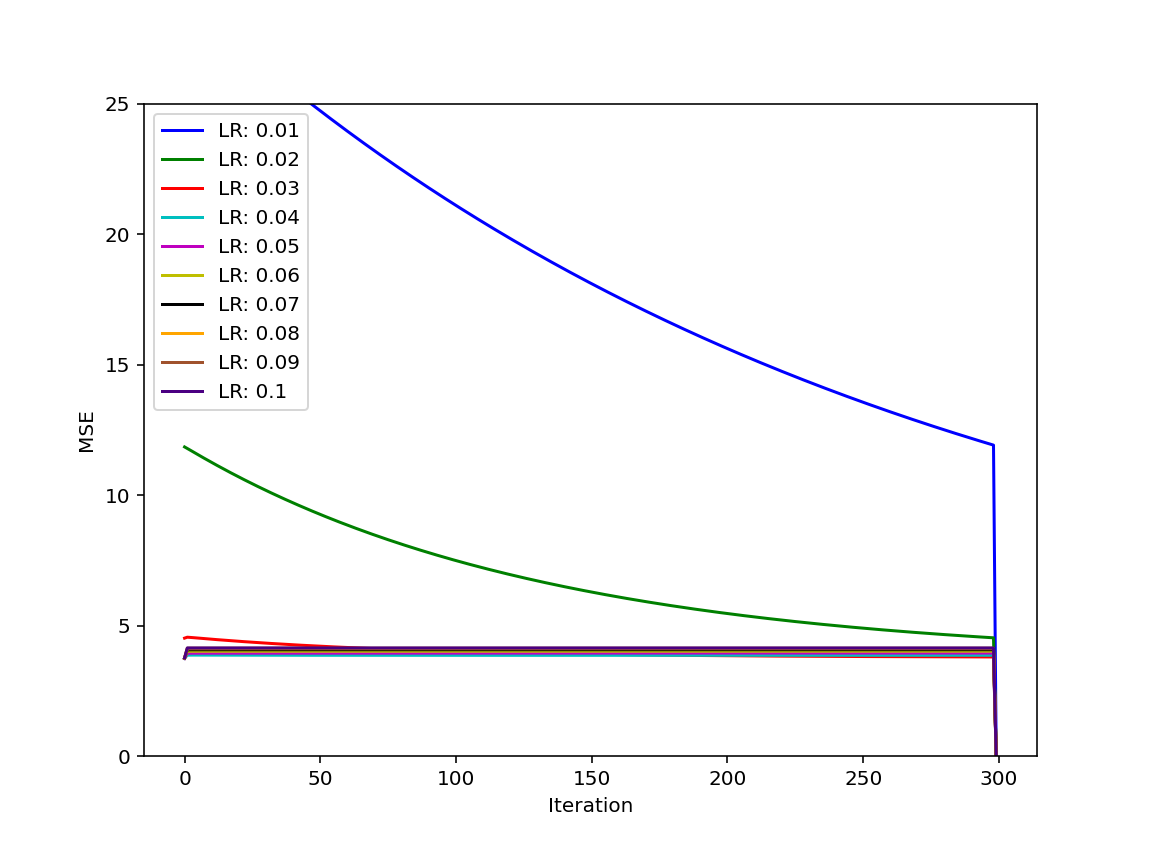

In [408]:
%matplotlib notebook
plt.figure(figsize=(8,6))
plt.plot(np.arange(max_it), batch_mse[0], color = 'b', label='LR: 0.01')
plt.plot(np.arange(max_it), batch_mse[1], color ='g', label='LR: 0.02')
plt.plot(np.arange(max_it), batch_mse[2], color ='r', label='LR: 0.03')
plt.plot(np.arange(max_it), batch_mse[3], color ='c', label='LR: 0.04')
plt.plot(np.arange(max_it), batch_mse[4], color = 'm', label='LR: 0.05')
plt.plot(np.arange(max_it), batch_mse[5], color ='y', label='LR: 0.06')
plt.plot(np.arange(max_it), batch_mse[6], color ='k', label='LR: 0.07')
plt.plot(np.arange(max_it), batch_mse[7], color ='orange', label='LR: 0.08')
plt.plot(np.arange(max_it), batch_mse[8], color ='sienna', label='LR: 0.09')
plt.plot(np.arange(max_it), batch_mse[9], color ='indigo', label='LR: 0.1')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.ylim(0,25)
plt.legend()
plt.show()

### Stochastic Learning Rate Comparisons

<IPython.core.display.Javascript object>


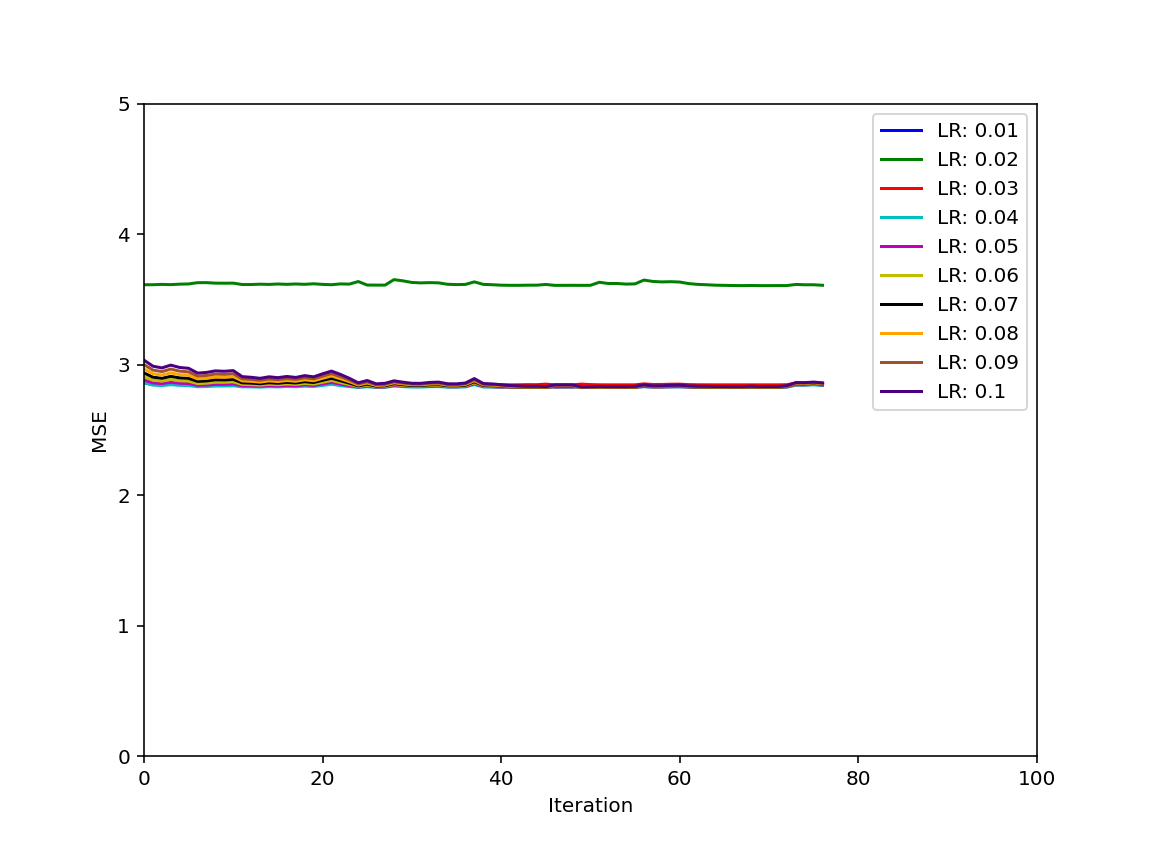

In [390]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(len(cost)), stoch_mse[0], color = 'b', label='LR: 0.01')
plt.plot(np.arange(len(cost)), stoch_mse[1], color ='g', label='LR: 0.02')
plt.plot(np.arange(len(cost)), stoch_mse[2], color ='r', label='LR: 0.03')
plt.plot(np.arange(len(cost)), stoch_mse[3], color ='c', label='LR: 0.04')
plt.plot(np.arange(len(cost)), stoch_mse[4], color = 'm', label='LR: 0.05')
plt.plot(np.arange(len(cost)), stoch_mse[5], color ='y', label='LR: 0.06')
plt.plot(np.arange(len(cost)), stoch_mse[6], color ='k', label='LR: 0.07')
plt.plot(np.arange(len(cost)), stoch_mse[7], color ='orange', label='LR: 0.08')
plt.plot(np.arange(len(cost)), stoch_mse[8], color ='sienna', label='LR: 0.09')
plt.plot(np.arange(len(cost)), stoch_mse[9], color ='indigo', label='LR: 0.1')
plt.ylim(0,5)
plt.xlim(0,100)
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.legend()
plt.show()